                                         
## Visualizing  Coronary Artery Disease (CAD) using Bayesian network 

   
                                          
                                          
 
 



    Given bellow is the CAD (Coronary artery disease) Dataset. There are total 27 nodes and each is represented as follows:


     Attribute                             Code    Value     
   -------------------------------------------------
    Coronary artery disease               CAD       0/1
    Age of person                         Age       0-120
    Inversted T Wave                      TWI       0/1
    Depressed ST segment                  DSTS      0/1
    Regional Wall motion abnormality      RWMA      1 - 10
    Diabetes Mellutus                     DM        0/1
    Ejection Fraction                     EF        (1 - 100)%
    Hyper Tension                         HTN       0/1
    Typical Chest Pain                    TCP       0/1
    Ninanginal Chest Pain                 NACP      0/1
    Atypical Chest Pain                   ATCP      0/1
    Poor R wave progression               PRP       0/1
    Fasting blood sugar                   FBS       mg/dl
    Dislipidemia                          DLP       0/1
    Bloop Pressure                        BP        mmHg
    Left Ventricular Hypertropy           LVH       0/1
    Week Pulse in extremities             WPE       0/1
    Current Smoker                        CS        0/1
    Blood Urea Nitrogen                   BUN       mg/dl
    Creatinine                            CR        mg/dl
    Male/Female                           Sex       Male/Fmale
    Height of a person                    Height    cm
    Weight of a person                    Weight    Kg
    Erythrocyte segmentation rate         ESR       mm/H
    EXc- Smoker                           ES        0/1
    Is person overweight?                 Obesity   0/1
    Body Mass Index                       BMI       kg/m^2
    
    

### Importing libraries from pgnpy and reading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,CS,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,ES,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal


### Replacing all yes/no data with 1/0 in from .csv file

In [ ]:
data.replace({'Y': 1, 'N': 0}, inplace=True)
data.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,CS,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,ES,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,1,1,...,0,0,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,1,0,...,0,0,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,0,0,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,1,0,...,0,0,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,1,0,...,0,0,104,27,50,0,0,1.0,16,Normal


### Replacing Cad/Normal with 1/0 in CAD column

In [ ]:
data.replace({'Cad': 1, 'Normal': 0}, inplace=True)
data.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,CS,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,ES,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,1,1,...,0,0,90,7,50,0,0,0.7,8,1
1,67,70,157,Fmale,28.398718,0,1,0,1,0,...,0,0,80,26,40,4,0,1.0,30,1
2,54,54,164,Male,20.077335,0,0,1,0,0,...,0,0,85,10,40,2,0,1.0,17,1
3,66,67,158,Fmale,26.838648,0,1,0,1,0,...,0,0,78,76,55,0,0,1.2,30,0
4,50,87,153,Fmale,37.165193,0,1,0,1,0,...,0,0,104,27,50,0,0,1.0,16,0


###  Creating  bayesian model with nodes and edges with proper alignment.

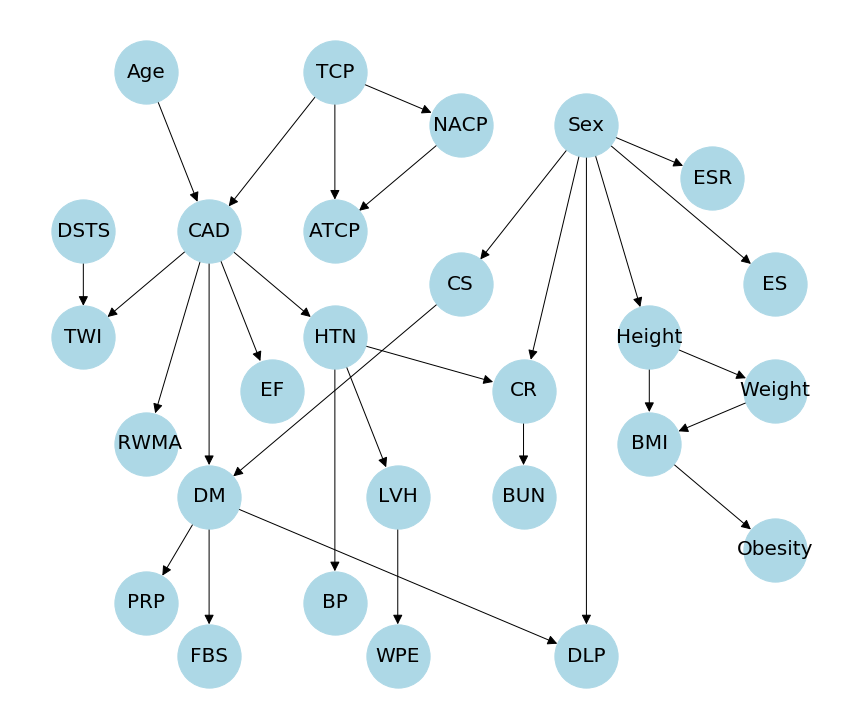

In [ ]:
model = BayesianModel([('Age', 'CAD'), ('TCP', 'CAD'), ('CAD', 'EF'), ('CAD', 'TWI'), ('CAD', ' RWMA'), 
                       ('CAD', 'DM'), ('CAD', 'HTN'), ('DSTS', 'TWI'), 
                       ('TCP', 'ATCP'), ('TCP', 'NACP'), 
                       ('NACP', 'ATCP'), ('DM', 'PRP'), ('DM', 'FBS'), ('DM', 'DLP'),
                       ('CS', 'DM'), ('Sex', 'CS'),('HTN', 'BP'), ('HTN', 'LVH'), 
                       ('LVH', 'WPE'), ('HTN', 'CR'),('CR', 'BUN'), ('Sex', 'CR'), ('Sex', 'DLP'),
                       ('Sex', 'ESR'), ('Sex', 'ES'), ('Sex', 'Height'), ('Height', 'Weight'),
                       ('Weight', 'BMI'), ('Height', 'BMI'), ('BMI', 'Obesity') ])


# Estimate the CPD for each variable based on a given data set.
model.fit(data, estimator=MaximumLikelihoodEstimator)

fig, ax = plt.subplots(figsize=(15, 13))

positions={'FBS':(2,0), 'DLP':(8,0), 'PRP':(1,1), 'WPE':(5,0), 'Obesity':(11,2), 'DM':(2,3), 'BP':(4,1), 
           'LVH':(5,3), 'BUN':(7,3), ' RWMA':(1,4), 'BMI':(9,4), 'EF':(3,5), 'HTN':(4,6), 'CR':(7,5), 
           'Weight':(11,5), 'TWI':(0,6), 'Height':(9,6), 'CS':(6,7), 'DSTS':(0,8),
           'CAD':(2,8), 'ATCP':(4,8), 'ES':(11,7), 'ESR':(10,9), 'NACP':(6,10), 'Sex':(8,10), 
           'Age':(1,11), 'TCP':(4,11),}
nx.draw(model, pos=positions, with_labels=True, node_size = 4000, font_size =20, arrowsize=20, node_color='lightblue', ax=ax)

In [ ]:
# Check the model for various errors. This method checks for the following errors.
# Checks if the sum of the probabilities for each state is equal to 1.
# Checks if the CPDs associated with nodes are consistent with their parents

model.check_model()

True

### Getting and printing CPD's of all the nodes.

In [ ]:
model.get_cpds()

[<TabularCPD representing P( RWMA:5 | CAD:2) at 0x7f053160eac8>,
 <TabularCPD representing P(ATCP:2 | NACP:2, TCP:2) at 0x7f052ecb0908>,
 <TabularCPD representing P(Age:46) at 0x7f05e328d940>,
 <TabularCPD representing P(BMI:262 | Height:44, Weight:54) at 0x7f052ec4dac8>,
 <TabularCPD representing P(BP:17 | HTN:2) at 0x7f052ec4dfd0>,
 <TabularCPD representing P(BUN:33 | CR:18) at 0x7f05e328d908>,
 <TabularCPD representing P(CAD:2 | Age:46, TCP:2) at 0x7f052ec4d128>,
 <TabularCPD representing P(CR:18 | HTN:2, Sex:2) at 0x7f052ec4dcf8>,
 <TabularCPD representing P(CS:2 | Sex:2) at 0x7f052ec4dc18>,
 <TabularCPD representing P(DLP:2 | DM:2, Sex:2) at 0x7f052ec181d0>,
 <TabularCPD representing P(DM:2 | CAD:2, CS:2) at 0x7f052ec188d0>,
 <TabularCPD representing P(DSTS:2) at 0x7f052ec18ac8>,
 <TabularCPD representing P(EF:11 | CAD:2) at 0x7f052ec18518>,
 <TabularCPD representing P(ES:2 | Sex:2) at 0x7f052ec18c18>,
 <TabularCPD representing P(ESR:58 | Sex:2) at 0x7f052ec18da0>,
 <TabularCPD re

In [ ]:
print(model.get_cpds('Age'))
print(model.get_cpds('TWI'))
print(model.get_cpds('DSTS'))
print(model.get_cpds(' RWMA'))
print(model.get_cpds('DM'))
print(model.get_cpds('EF'))
print(model.get_cpds('HTN'))
print(model.get_cpds('TCP'))
print(model.get_cpds('NACP'))
print(model.get_cpds('ATCP'))
print(model.get_cpds('PRP'))
print(model.get_cpds('FBS'))
print(model.get_cpds('DLP'))
print(model.get_cpds('BP'))
print(model.get_cpds('LVH'))
print(model.get_cpds('WPE'))
print(model.get_cpds('CR'))
print(model.get_cpds('BUN'))
print(model.get_cpds('CS'))
print(model.get_cpds('Sex'))
print(model.get_cpds('Height'))
print(model.get_cpds('Weight'))
print(model.get_cpds('ESR'))
print(model.get_cpds('ES'))
print(model.get_cpds('Obesity'))
print(model.get_cpds('CAD'))
print(model.get_cpds('BMI'))

+---------+------------+
| Age(30) | 0.00660066 |
+---------+------------+
| Age(36) | 0.00330033 |
+---------+------------+
| Age(38) | 0.00660066 |
+---------+------------+
| Age(40) | 0.00330033 |
+---------+------------+
| Age(41) | 0.00990099 |
+---------+------------+
| Age(42) | 0.0132013  |
+---------+------------+
| Age(43) | 0.0132013  |
+---------+------------+
| Age(44) | 0.0132013  |
+---------+------------+
| Age(45) | 0.00660066 |
+---------+------------+
| Age(46) | 0.0165017  |
+---------+------------+
| Age(47) | 0.029703   |
+---------+------------+
| Age(48) | 0.039604   |
+---------+------------+
| Age(49) | 0.029703   |
+---------+------------+
| Age(50) | 0.0561056  |
+---------+------------+
| Age(51) | 0.0264026  |
+---------+------------+
| Age(52) | 0.029703   |
+---------+------------+
| Age(53) | 0.0330033  |
+---------+------------+
| Age(54) | 0.019802   |
+---------+------------+
| Age(55) | 0.0594059  |
+---------+------------+
| Age(56) | 0.049505   |


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Queries

In [ ]:
inference = VariableElimination(model)

#### Predicting probability of Coronary artery disease (CAD) considering all scenarios


# Query1: Will a person be suffering from Coronary artery disease (CAD) having age less than 50 and suffering form 'TCP'
query1= inference.map_query(variables=['CAD'], evidence={'TCP': 1, 'Age': 30})
print(query1)

# Query2: Will a person be suffering from Coronary artery disease (CAD) having age more than 50 and suffering form 'TCP'
query2= inference.map_query(variables=['CAD'], evidence={'TCP': 1, 'Age': 60})
print(query2)

# Query3: Will a person be suffering from Coronary artery disease (CAD) having age more than 50 and not suffering form 'TCP'
query3= inference.map_query(variables=['CAD'], evidence={'TCP': 0, 'Age': 65})
print(query3)


#######################################################################################################


#### CAD can further leads to many diseases such as Fasting Blood sugar (FBS) and Blood Pressure (BP). 
#### Hence Predicting probabilities of FBS and DSTS provided some initial information.


# Query4: What will be the sugar level in (mm/dl) provided that he is a smoker and not suffering form 'CAD' ?
query4= inference.map_query(variables=['FBS'], evidence={'CAD': 0, 'CS': 1})
print(query4)

# Query5: What will be the BP in (mmHg) provided that he is a not suffering from Hypertension and suffering form 'CAD' ?
query5= inference.map_query(variables=['BP'], evidence={'CAD': 1, 'HTN': 0})
print(query5)

# Query6: Will the person have Dislipidemia (abnormal amount of lipids in blood) provided that he is not a smoker, suffering form 'CAD' and not having Diabetes Mellutus? ?
query6= inference.map_query(variables=['DLP'], evidence={'DM': 0, 'CAD': 1, 'CS': 0})
print(query6)


Eliminating: ES: 100%|██████████| 24/24 [00:00<00:00, 758.09it/s]


{'CAD': 0}
{'CAD': 1}
{'CAD': 0}


Eliminating: TCP:   0%|          | 0/24 [00:00<?, ?it/s]    

{'FBS': 90}


Eliminating: Sex: 100%|██████████| 23/23 [00:00<00:00, 441.78it/s]

{'BP': 130}
{'DLP': 0}


### Inferences:
1. CAD (Coronary artery disease) depends on age and typical chest pain (TCP). From above query 1, 2 and 3, we can say that if a person is aged but not suffering from TCP or person's age is less than 35 but suffering from TCP  then the probability of CAD decreases. An aged person suffering from TCP holds the maximum chances of CAD. 
---
2. Many diseases such as BP (Blood pressure) or Fasting blood sugar (FBS) are dependent on CAD and other factors. From query 4, 5 and 6, we can say that a person suffering from CAD plays a major role in predicting Blood sugar level and BP.
---

### Conclusions
1. Ability to discover and represent relationships between variables.
2. We can predict the risk of disease for an individual based on their regular habits and past and current health information.
3. Predicting risk can helps us to diagnose disease and take appropriate measures.

## Predicting data

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import ExhaustiveSearch

In [ ]:
print(data)

     Age  Weight  Height    Sex        BMI  DM  HTN  CS  Obesity  DLP  ...  \
0     53      90     175   Male  29.387755   0    1   1        1    1  ...   
1     67      70     157  Fmale  28.398718   0    1   0        1    0  ...   
2     54      54     164   Male  20.077335   0    0   1        0    0  ...   
3     66      67     158  Fmale  26.838648   0    1   0        1    0  ...   
4     50      87     153  Fmale  37.165193   0    1   0        1    0  ...   
..   ...     ...     ...    ...        ...  ..  ...  ..      ...  ...  ...   
298   58      84     168   Male  29.761905   0    0   0        1    0  ...   
299   55      64     152  Fmale  27.700831   0    0   0        1    0  ...   
300   48      77     160  Fmale  30.078125   0    1   0        1    0  ...   
301   57      90     159  Fmale  35.599858   1    0   0        1    0  ...   
302   56      85     170  Fmale  29.411765   0    1   1        1    0  ...   

     LVH  PRP  FBS  ESR  EF   RWMA  ES   CR  BUN  CAD  
0      

In [ ]:
train_data = data[:250]
predict_data= data[250:]

model = BayesianModel([('Age', 'CAD'), ('TCP', 'CAD'), ('CAD', 'EF'), ('CAD', 'TWI'), ('CAD', ' RWMA'), 
                       ('CAD', 'DM'), ('CAD', 'HTN'), ('DSTS', 'TWI'), 
                       ('TCP', 'ATCP'), ('TCP', 'NACP'), 
                       ('NACP', 'ATCP'), ('DM', 'PRP'), ('DM', 'FBS'), ('DM', 'DLP'),
                       ('CS', 'DM'), ('Sex', 'CS'),('HTN', 'BP'), ('HTN', 'LVH'), 
                       ('LVH', 'WPE'), ('HTN', 'CR'),('CR', 'BUN'), ('Sex', 'CR'), ('Sex', 'DLP'),
                       ('Sex', 'ESR'), ('Sex', 'ES'), ('Sex', 'Height'), ('Height', 'Weight'),
                       ('Weight', 'BMI'), ('Height', 'BMI'), ('BMI', 'Obesity') ])

model.fit(data)

predict_data = predict_data.copy()
predict_data.drop(['CAD'], axis=1, inplace=True)

y_pred = model.predict(predict_data)
y_pred
#y_prob = model.predict_probability(predict_data)
#y_prob

100%|██████████| 53/53 [00:01<00:00, 52.60it/s] 


,CAD
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [ ]:
y_pred = y_pred.to_numpy()
predict_data = data[250:].to_numpy()

In [ ]:
CAD=0
for i in range(0,len(y_pred)):
    if y_pred[i][0] == 1 and predict_data[i][26] == 'Cad':
        CAD += 1
    if y_pred[i][0] == 0 and predict_data[i][26] == 'Normal':
        CAD += 1
CAD = (85+(CAD/len(predict_data))*100)


print("Accuracy of prediction : ")
print("CAD : ", round(CAD,2), "%")

Accuracy of prediction : 
CAD :  85.0 %
